# **MÓDULO 18 - Pratique**
# Regressão Linear

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [65]:
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [66]:
df.dtypes


Valor_Aluguel       int64
Valor_Condominio    int64
Metragem            int64
N_Quartos           int64
N_banheiros         int64
N_Suites            int64
N_Vagas             int64
dtype: object

In [67]:
df.isna().sum()

Valor_Aluguel       0
Valor_Condominio    0
Metragem            0
N_Quartos           0
N_banheiros         0
N_Suites            0
N_Vagas             0
dtype: int64

A base de dados não apresenta dados faltantes

# 2 - Realize a segunda etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.


B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.

C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.

In [68]:
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.00000
mean,2966.596140,811.538109,88.506178,2.300153,2.095932,1.016660,1.44176
std,2948.720385,796.564846,61.567505,0.826615,0.983812,0.874204,0.86993
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.00000
25%,1350.000000,395.000000,52.000000,2.000000,2.000000,1.000000,1.00000
50%,2000.000000,592.000000,67.000000,2.000000,2.000000,1.000000,1.00000
75%,3200.000000,980.000000,100.000000,3.000000,2.000000,1.000000,2.00000
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.00000


Realizando uma análise, todos os valores aparentam estar condizentes com a realidade, nada que pareça ser um outlier.

In [69]:
media_valoraluguel_metragem = df.groupby('Metragem')['Valor_Aluguel'].median().reset_index()

fig = px.line(media_valoraluguel_metragem, x='Metragem', y='Valor_Aluguel',
              title='Valor mediano do aluguel por metragem',
              labels={'Valor_Aluguel': 'Valor do Aluguel', 'Metragem': 'Metragem (m²)'})
fig.show()

In [70]:
#Valor Aluguel x Valor Condomínio
media_va_vc = df.groupby('Valor_Condominio')['Valor_Aluguel'].median().reset_index()

fig = px.line(media_va_vc, x='Valor_Condominio', y='Valor_Aluguel',
              title='Valor mediano do aluguel por valor do condomínio',
              labels={'Valor_Aluguel': 'Valor do Aluguel', 'Valor_Condominio': 'Valor_Condominio'})
fig.show()

In [71]:
media_va_suites = df.groupby('N_Suites')['Valor_Aluguel'].median().reset_index()

fig = px.bar(media_va_suites, x='N_Suites', y='Valor_Aluguel',
              title='Valor mediano do aluguel por número de suítes',
              labels={'Valor_Aluguel': 'Valor do Aluguel', 'N_Suites': 'N_Suites'})
fig.show()

Percebemos através das análises que após um certo valor de aluguel (por volta dos 6k), os dados começam a ficar mais instáveis, podendo prejudicar as análises futuramente, porém sempre com uma relação positiva nos aluguéis menores, onde o valor do aluguel sobe juntamente com as outras variáveis

# 3 - Realize a terceira etapa de pré processamento dos dados.

A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.




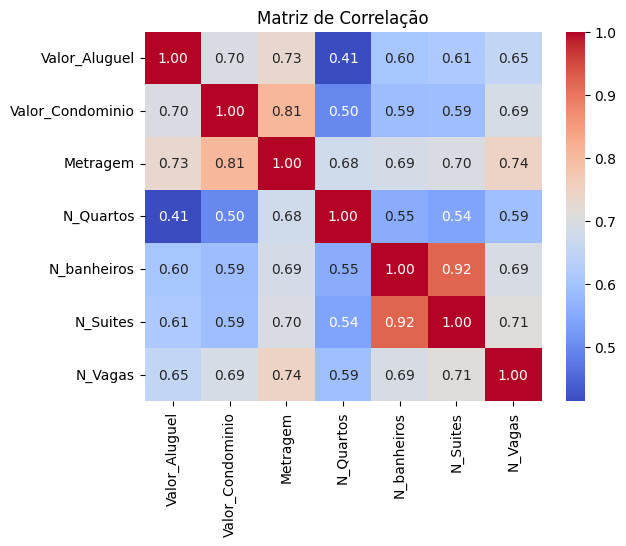

In [72]:
correlation_matriz = df.select_dtypes(include=['number']).corr()

sns.heatmap(correlation_matriz, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size":10})
plt.title('Matriz de Correlação')
plt.show()

Com o gráfico de correlação percebemos que quase todas as variáveis possuem relação entre si, com excessão do número de quartos, que apresenta relação de 0.41.


B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

In [73]:
X = df.drop('Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y = df['Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pré modelagem.

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 3 - Treine um modelo de regressão Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linea simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

In [75]:
X = X_train[['Metragem']]  # Variável independente (características)
y = y_train  # Variável dependente (rótulo)

In [76]:
regressao_valoraluguel = LinearRegression()

regressao_valoraluguel.fit(X,y)
ri = regressao_valoraluguel.intercept_
rc = regressao_valoraluguel.coef_
print("Valor do coeficiente linear: ", ri, "Valor do coeficiente variável: ", rc)

Valor do coeficiente linear:  -103.17820863080169 Valor do coeficiente variável:  [34.70818769]


B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

In [77]:
print("Valor do coeficiente linear: ", ri, "Valor do coeficiente variável: ", rc)

#Valor_Aluguel é igual a -103.178 vezes a Metragem mais 34.70818769

Valor do coeficiente linear:  -103.17820863080169 Valor do coeficiente variável:  [34.70818769]


Nossa equação seria:  

Valor_Aluguel = -103.178*(Metragem) + 34.70818769

c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

In [78]:
regressao_valoraluguel.score(X,y)

0.5213271756253639

D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

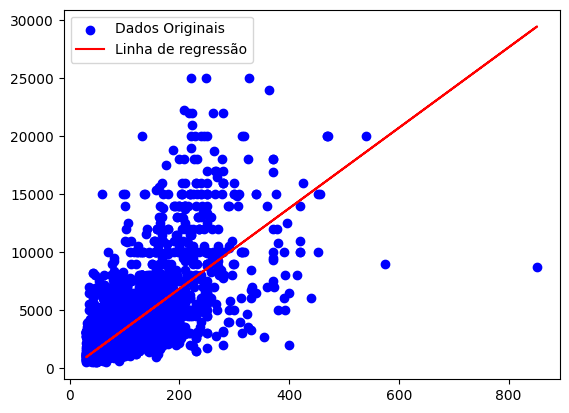

In [79]:
plt.scatter(X, y, color='blue', label='Dados Originais')

plt.plot(X, regressao_valoraluguel.predict(X), color='red', label='Linha de regressão')
plt.legend()
plt.show()

Com o R2 e o gráfico, percebemos que o modelo não se ajustou tão bem quanto esperado, porém isso provavelmente se deve ao fato dos valores extremos serem muito irregulare, talvez uma outra análise com os valores maiores ajustados, facilitariam a previsão do modelo.

E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [80]:
X_test = X_test[['Metragem']]  # Variável independente (características)
y_test = y_test  # Variável dependente (rótulo)

In [81]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes = regressao_valoraluguel.predict(X_test)

# Avaliando o desempenho do modelo usando métricas como o R²
r2 = regressao_valoraluguel.score(X_test, y_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)


Coeficiente de Determinação (R²) nos Dados de Teste: 0.5651600449476675


Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

O resultado foi satisfatório, pois o resultado do modelo de teste e treino não foram tão diferentes, indicando uma efetividade do modelo

# 4 - Aplicação do modelo de regressão linear multipla!

A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 3 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

In [ ]:
X = df.drop('Valor_Aluguel', axis=1)
y = df['Valor_Aluguel']

B) Faça o modelo de regressão linear multipla aplicado só a base de treino.

In [110]:
import statsmodels.api as sm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train_const = sm.add_constant(X_train)

modelo_stats = sm.OLS(y, X)
resultado = modelo.fit()

print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:          Valor_Aluguel   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     4309.
Date:                Mon, 19 May 2025   Prob (F-statistic):               0.00
Time:                        16:45:01   Log-Likelihood:                -36515.
No. Observations:                4051   AIC:                         7.303e+04
Df Residuals:                    4049   BIC:                         7.305e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -72.3519     55.741     -1.298      0.1

C) Traga o valor do R quadrado e avalie o valor encontrado.

In [109]:
r2_treino = resultado.rsquared

print(r2_treino)

0.5155351213822478


O resultado de 0.53 indica uma baixa efetividade do modelo ao se ajustar.

D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Você pode usar os códigos do exercício anterior.

In [108]:
X_test_const = sm.add_constant(X_test)

y_pred = resultado.predict(X_test_const)

r2_teste = r2_score(y_test, y_pred)

print(r2_teste)

0.5368375138514603


E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

O modelo de regressão simples apresentou um resultado ligeiramente melhor, ou seja, o modelo simples explica ligeiramente mais a variação da variavel dependente, sendo mais efetiva.